In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# huper parameter
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
# load the MNIST data
train_dataset = torchvision.datasets.MNIST(root='E:/ml/torch_mnist_data', train=True, transform = transforms.ToTensor()) #  transforms.ToTensor() it transform the data into the tensors that pytorch can accept
test_dataset = torchvision.datasets.MNIST(root='E:/ml/torch_mnist_data', train=False, transform = transforms.ToTensor())

In [5]:
# load the train data into the pytorch
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
example = iter(train_loader)
sample, labels = example.next()
print(sample.shape,labels.shape)
# torch.Size([100, 1, 28, 28]) torch.Size([100]) :- 100 hidden layer, 1 is colour channel, 28,28 image, 100 is label

torch.Size([100, 1, 28, 28]) torch.Size([100])


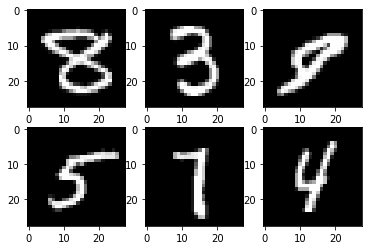

In [7]:
for i in range(6):
    plt.subplot(2, 3, i+1) # 2 is row, 3 is column
    plt.imshow(sample[i][0], cmap='gray')

In [8]:
# create model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [9]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device) # -1 is for pytorch automatically find correct size for ua
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/2], Step [100/600], Loss: 0.5220
Epoch [1/2], Step [200/600], Loss: 0.3714
Epoch [1/2], Step [300/600], Loss: 0.2112
Epoch [1/2], Step [400/600], Loss: 0.1942
Epoch [1/2], Step [500/600], Loss: 0.1299
Epoch [1/2], Step [600/600], Loss: 0.2135
Epoch [2/2], Step [100/600], Loss: 0.1739
Epoch [2/2], Step [200/600], Loss: 0.1702
Epoch [2/2], Step [300/600], Loss: 0.1902
Epoch [2/2], Step [400/600], Loss: 0.1111
Epoch [2/2], Step [500/600], Loss: 0.0896
Epoch [2/2], Step [600/600], Loss: 0.1031
Accuracy of the network on the 10000 test images: 95.17 %


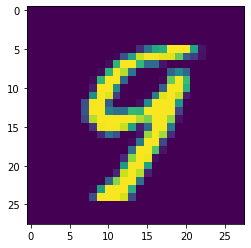

In [19]:
plt.imshow(images[1].view(28,28))

In [21]:
#print(torch.argmax(net(X[5].view(-1, 784))[0]))
print(labels[1])

tensor(9)
